In [52]:
import numpy as np
import optimization
import oracles
import plot_trajectory_2d
from sklearn.datasets import load_svmlight_file
import scipy as sp
import optimization_t1
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Experiment 1

Optimization task: 
 [[2 0]
 [0 1]] = A , b = [0 0] x_0 = [ 2.   4.8]

 Condition number of A:  2.0
 
 
 
 

 Status of optimisation:  success [ 0.  0.]

 Number of iterations     2


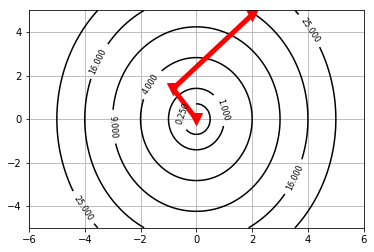

In [5]:
A = np.array([[2, 0], [0,1]])
b = np.array([0, 0])
x_0 = np.array([2, 4.8])

print("Optimization task: \n", A, "= A , b =", b, "x_0 =", x_0)
print("\n Condition number of A: ", np.linalg.cond(A), end='\n \n \n \n \n')  

oracle = oracles.QuadraticOracle(A, b)
matvec = lambda x: A.dot(x)

x_star, message, history = optimization.conjugate_gradients(matvec, b, x_0, trace=True)

print("\n Status of optimisation: ", message, x_star)
print("\n Number of iterations    ", len(history['residual_norm']) - 1)

plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
savefig('Exp1_1.png')

Optimization task: 
 [[15  0]
 [ 0  1]] = A , b = [0 0] x_0 = [ 2.   4.8]

 Condition number of A:  15.0
 
 
 
 

 Status of optimisation:  success [ -1.49880108e-15   0.00000000e+00]

 Number of iterations     2


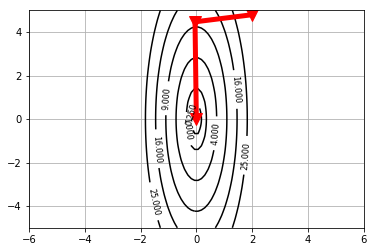

In [5]:
A = np.array([[15, 0], [0,1]])
b = np.array([0, 0])
x_0 = np.array([2,4.8])

print("Optimization task: \n", A, "= A , b =", b, "x_0 =", x_0)
print("\n Condition number of A: ", np.linalg.cond(A), end='\n \n \n \n \n')  

oracle = oracles.QuadraticOracle(A, b)
matvec = lambda x: A.dot(x)

x_star, message, history = optimization.conjugate_gradients(matvec, b, x_0, trace=True)

print("\n Status of optimisation: ", message, x_star)
print("\n Number of iterations    ", len(history['residual_norm']) - 1)

plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
savefig('Exp1_2.png')

## Сопряженные градиенты

In [61]:
random.seed(42)

ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 35, 50, 100, 1000]
ks = [1, 2, 10, 100, 200, 300, 700, 1000]

forgr = []
for n in ns:
    for k in ks:
        resToMean = []
        for times in range(100):
            a = [1, k]
            for i in range(2, n):
                a.append(random.uniform(1, k))
            A = sp.sparse.diags(a)
            b = np.random.uniform(-2 * k, 2*k, n)
            x_0 = rand(n) * 3
            
            oracle = oracles.QuadraticOracle(A, b)
            matvec = lambda x: A.dot(x)
            x_star, message, history = optimization.conjugate_gradients(matvec, b, x_0, trace=True)

            
            resToMean.append(len(history['residual_norm']) - 1)
        print(mean(resToMean), end='      ')
        forgr.append(mean(resToMean))
    print()

1.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0      
1.0      2.99      3.0      3.0      3.0      3.0      3.0      3.0      
1.0      3.88      4.0      4.0      4.0      4.0      4.0      4.0      
1.0      4.64      4.96      4.99      4.99      5.0      4.99      5.0      
1.0      5.06      5.95      5.99      5.99      6.0      5.99      6.0      
1.0      5.33      6.83      7.0      6.99      6.99      7.0      6.99      
1.0      5.35      7.64      7.93      7.95      7.98      7.98      7.99      
1.0      5.54      8.33      8.84      8.86      8.94      8.95      8.99      
1.0      5.55      9.09      9.87      9.7      9.88      9.9      9.92      
1.0      5.84      11.1      13.94      13.99      14.13      14.04      14.37      
1.0      5.97      12.13      16.73      17.66      17.44      17.93      18.39      
1.0      5.99      12.85      19.72      20.69      20.71      21.19      21.74      
1.0      5.99      13.62      23.57      25.37    

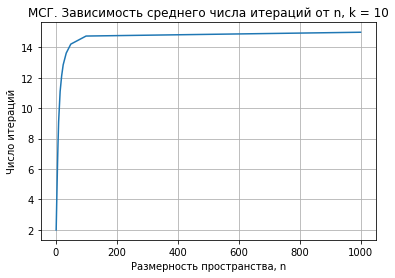

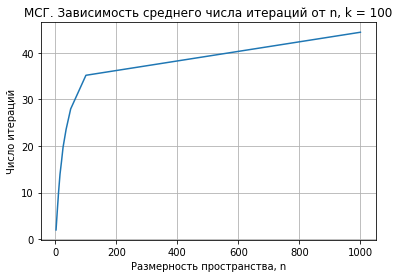

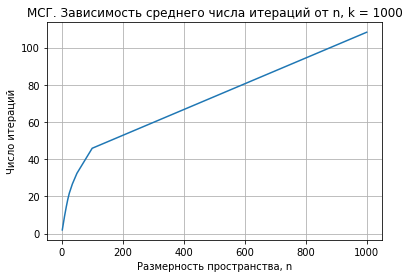

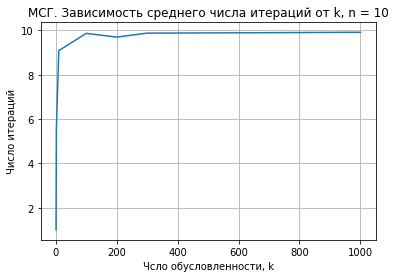

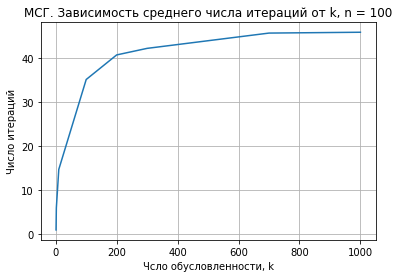

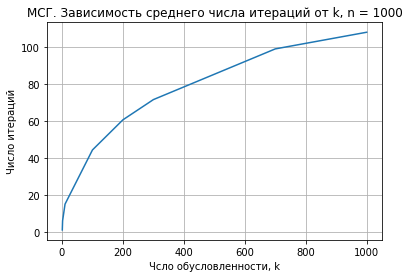

In [62]:
for knumb in [2, 3, len(ks) -1]:
    y = []
    for i in range(knumb, len(ns) * len(ks) + 1, 8):
        y.append(forgr[i])
    title('МСГ. Зависимость среднего числа итераций от n, k = %d' %ks[knumb])
    xlabel('Размерность пространства, n')
    ylabel('Число итераций')
    grid(True)
    plot(ns, y)
    savefig('1_MSG_k_%d' %ks[knumb])
    show()
    
for nnumb in [ns.index(10), ns.index(100), len(ns) - 1]:
    y = []
    for i in range(len(ks)):
        y.append(forgr[len(ks) * nnumb + i])
    title('МСГ. Зависимость среднего числа итераций от k, n = %d' %ns[nnumb])
    xlabel('Чсло обусловленности, k')
    ylabel('Число итераций')
    grid(True)
    plot(ks, y)
    savefig('1_MSG_n_%d' %ns[nnumb])
    show()

## Градиентный спуск

In [68]:
random.seed(42)

ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 35, 50, 100, 1000]
ks = [1, 2, 10, 100, 200, 300, 700, 1000]


forgr = []
for n in ns:
    for k in ks:
        resToMean = []
        for times in range(100):
            a = [1, k]
            for i in range(2, n):
                a.append(random.uniform(1, k))
            A = sp.sparse.diags(a)
            b = np.random.uniform(-2 * k, 2*k, n)
            x_0 = rand(n) * 3
            
            
            oracle = oracles.QuadraticOracle(A, b)
            optParamDict = {'method': 'Wolfe','alpha_0': 1,'c1': 1e-4,'c2': 0.9, 'c' : 1/15}
            lst = optimization_t1.get_line_search_tool(optParamDict)
            x_star, message, history = optimization_t1.gradient_descent(oracle, 
                                                         x_0,
                                                         tolerance=1e-5, 
                                                         max_iter=10000,
                                                         line_search_options=lst, 
                                                         trace=True, 
                                                         display=False)

            
            resToMean.append(len(history['func']))
        print(mean(resToMean), end='      ')
        forgr.append(mean(resToMean))
    print()

2.0      3.21      16.55      

/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


147.87      278.81      246.96      898.72      1084.46      
2.0      6.28      19.68      159.09      275.73      363.77      912.83      1242.4      
2.0      7.27      22.75      152.52      291.46      358.93      992.85      1332.51      
2.0      7.98      23.69      157.82      310.54      349.09      846.36      1319.05      
2.0      8.25      21.99      155.69      279.93      378.39      894.95      1342.06      
2.0      8.43      21.6      156.33      280.45      372.64      871.31      1334.57      
2.0      8.55      22.56      140.01      314.71      351.91      859.88      1414.08      
2.0      8.96      22.82      147.8      269.99      352.4      838.61      1354.52      
2.0      8.99      22.93      149.57      300.28      354.72      839.74      1304.54      
2.0      9.58      22.85      137.43      271.67      328.31      824.48      1334.96      
2.0      9.19      21.44      133.12      293.21      316.58      773.77      1364.31      
2.0      9.33      21.

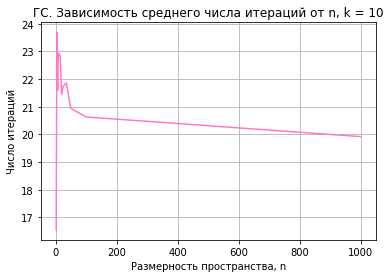

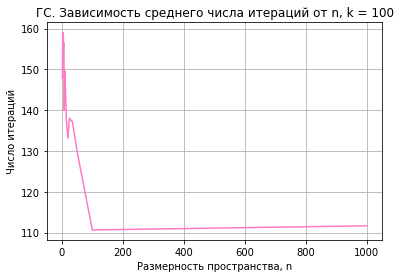

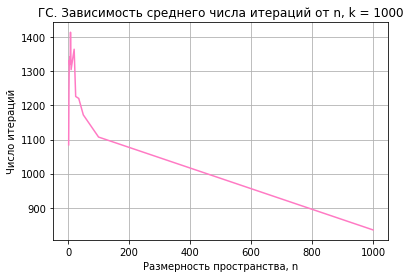

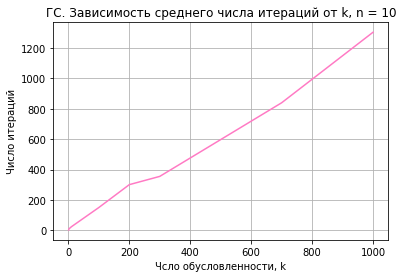

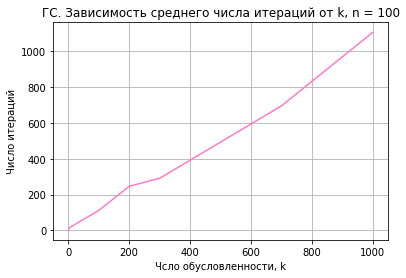

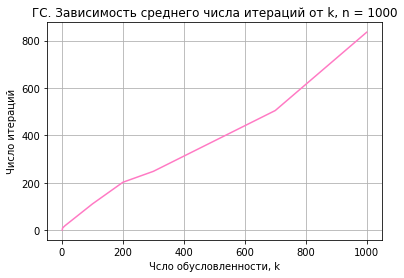

In [85]:
for knumb in [2, 3, len(ks) -1]:
    y = []
    for i in range(knumb, len(ns) * len(ks), 8):
        y.append(forgr[i])
    title('ГС. Зависимость среднего числа итераций от n, k = %d' %ks[knumb])
    xlabel('Размерность пространства, n')
    ylabel('Число итераций')
    grid(True)
    plot(ns, y, c='#ff7ac4')
    savefig('1_GD_k_2_%d' %ks[knumb])
    show()
    
for nnumb in [ns.index(10), ns.index(100), len(ns) - 1]:
    y = []
    for i in range(len(ks)):
        y.append(forgr[len(ks) * nnumb + i])
    title('ГС. Зависимость среднего числа итераций от k, n = %d' %ns[nnumb])
    xlabel('Чсло обусловленности, k')
    ylabel('Число итераций')
    grid(True)
    plot(ks, y, c='#ff7ac4')
    #savefig('1_GD_n_%d' %ns[nnumb])
    show()

In [77]:
ns[1:]

[3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 35, 50, 100, 1000]

# Experiment 2

In [4]:
A_gis, b_gis = load_svmlight_file('gisette')
x_0 = np.zeros(A_gis.shape[1])

oracle_gis = oracles.create_log_reg_oracle(A_gis, b_gis, regcoef=1/A_gis.shape[0])
dfx0 = oracle_gis.grad(x_0)

histories = []
ls = [0, 1, 5, 10, 50, 100]
for l in ls:
    x, message, history = optimization.lbfgs(oracle_gis, x_0, memory_size=l, trace=True)
    histories.append(history)

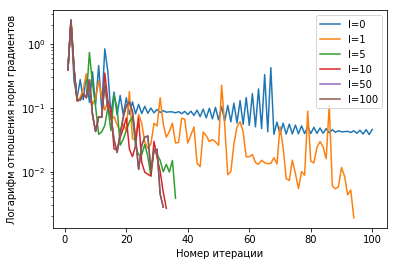

In [5]:
for i,l in zip(range(6), ls): 
    plot(range(1, len(histories[i]['grad_norm']) + 1)[:100] , histories[i]['grad_norm'][:100] / dfx0.dot(dfx0), label='l=%d'%l)
yscale('log')
xlabel('Номер итерации')
ylabel('Логарифм отношения норм градиентов')
legend()
savefig('Exp2_1.png', dpi=100)

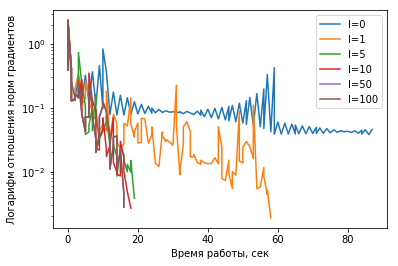

In [6]:
for i,l in zip(range(6), ls): 
    plot(histories[i]['time'][:100] , histories[i]['grad_norm'][:100] / dfx0.dot(dfx0), label='l=%d'%l)
yscale('log')
xlabel('Время работы, сек')
ylabel('Логарифм отношения норм градиентов')
legend()
savefig('Exp2_2.png', dpi=100)

# Experiment 3

In [1]:
import numpy as np
import optimization
import oracles
import plot_trajectory_2d
from sklearn.datasets import load_svmlight_file

%pylab inline

import optimization_t1

Populating the interactive namespace from numpy and matplotlib


In [2]:
methods = ['lbfgs', 'GD', 'HFN']

  ## w8a

In [3]:
A_w8a, b_w8a = load_svmlight_file('w8a')
x_0 = np.zeros(A_w8a.shape[1])

oracle_w8a = oracles.create_log_reg_oracle(A_w8a, b_w8a, regcoef=1/A_w8a.shape[0])
dfx0 = oracle_w8a.grad(x_0)
dfx0_norm = np.linalg.norm(dfx0)
histories_w8a = []
x, message, history = optimization.lbfgs(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization_t1.gradient_descent(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization.hessian_free_newton(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)

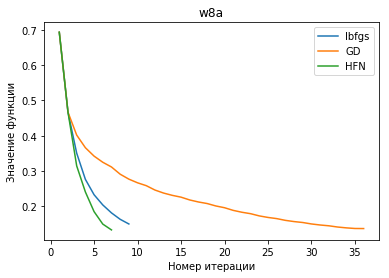

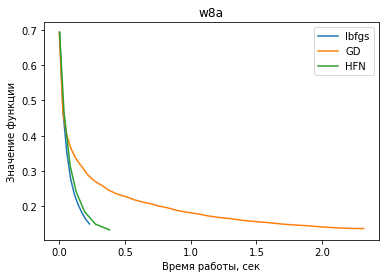

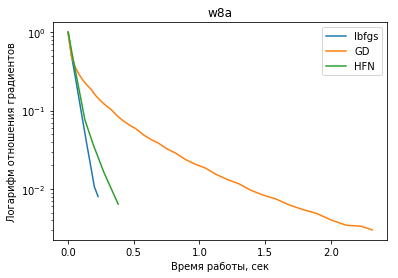

0.229541
2.315071
0.382474


In [5]:
for i, meth in zip(range(3), methods): 
    plot(range(1, len(histories_w8a[i]['grad_norm']) + 1), histories_w8a[i]['func'], label='%s'%meth)


legend()
title('w8a')
ylabel('Значение функции')
xlabel('Номер итерации')
savefig('3_1_w8a.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['func'], label='%s'%meth)


legend()
title('w8a')
ylabel('Значение функции')
xlabel('Время работы, сек')
savefig('3_2_w8a.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['grad_norm'] / dfx0_norm, label='%s'%meth)

yscale('log')
legend()
title('w8a')
ylabel('Логарифм отношения градиентов')
xlabel('Время работы, сек')
savefig('3_3_w8a.png')
show()


for i in range(3):
    print(histories_w8a[i]['time'][-1])

## rcv1

In [6]:
A_w8a, b_w8a = load_svmlight_file('rcv1')
x_0 = np.zeros(A_w8a.shape[1])

oracle_w8a = oracles.create_log_reg_oracle(A_w8a, b_w8a, regcoef=1/A_w8a.shape[0])
dfx0 = oracle_w8a.grad(x_0)
dfx0_norm = np.linalg.norm(dfx0)
histories_w8a = []
x, message, history = optimization.lbfgs(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization_t1.gradient_descent(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization.hessian_free_newton(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)

/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


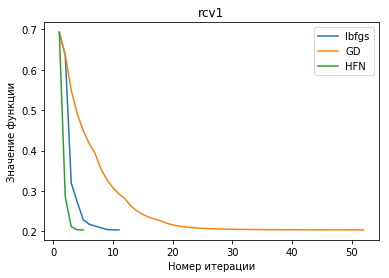

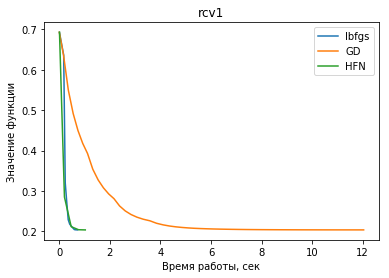

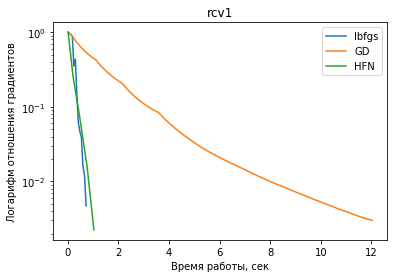

0.719101
12.04001
1.028468


In [9]:
for i, meth in zip(range(3), methods): 
    plot(range(1, len(histories_w8a[i]['grad_norm']) + 1), histories_w8a[i]['func'], label='%s'%meth)


legend()
title('rcv1')
ylabel('Значение функции')
xlabel('Номер итерации')
savefig('3_1_rcv.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['func'], label='%s'%meth)


legend()
title('rcv1')
ylabel('Значение функции')
xlabel('Время работы, сек')
savefig('3_2_rcv.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['grad_norm'] / dfx0_norm, label='%s'%meth)

yscale('log')
legend()
title('rcv1')
ylabel('Логарифм отношения градиентов')
xlabel('Время работы, сек')
savefig('3_3_rcv.png')
show()


for i in range(3):
    print(histories_w8a[i]['time'][-1])

## Realsim

In [19]:
A_w8a, b_w8a = load_svmlight_file('realsim')
x_0 = np.zeros(A_w8a.shape[1])

oracle_w8a = oracles.create_log_reg_oracle(A_w8a, b_w8a, regcoef=1/A_w8a.shape[0])
dfx0 = oracle_w8a.grad(x_0)
dfx0_norm = np.linalg.norm(dfx0)
histories_w8a = []
x, message, history = optimization.lbfgs(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization_t1.gradient_descent(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization.hessian_free_newton(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)

/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


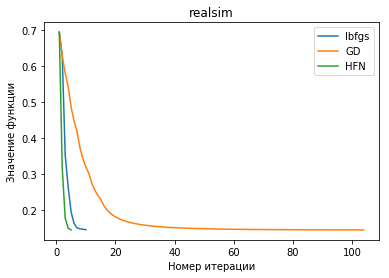

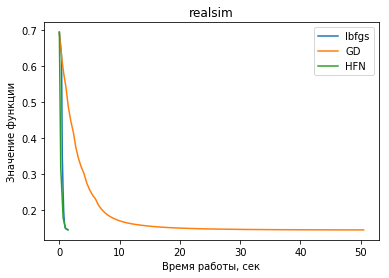

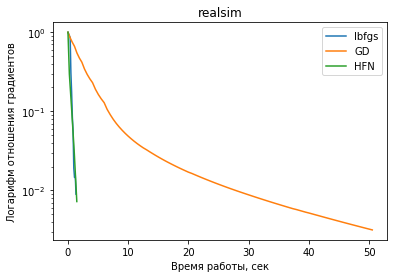

1.341402
50.512496
1.476368


In [20]:
for i, meth in zip(range(3), methods): 
    plot(range(1, len(histories_w8a[i]['grad_norm']) + 1), histories_w8a[i]['func'], label='%s'%meth)


legend()
title('realsim')
ylabel('Значение функции')
xlabel('Номер итерации')
savefig('3_1_sim.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['func'], label='%s'%meth)


legend()
title('realsim')
ylabel('Значение функции')
xlabel('Время работы, сек')
savefig('3_2_sim.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['grad_norm'] / dfx0_norm, label='%s'%meth)

yscale('log')
legend()
title('realsim')
ylabel('Логарифм отношения градиентов')
xlabel('Время работы, сек')
savefig('3_3_sim.png')
show()


for i in range(3):
    print(histories_w8a[i]['time'][-1])

## news20

In [21]:
A_w8a, b_w8a = load_svmlight_file('news20')
x_0 = np.zeros(A_w8a.shape[1])

oracle_w8a = oracles.create_log_reg_oracle(A_w8a, b_w8a, regcoef=1/A_w8a.shape[0])
dfx0 = oracle_w8a.grad(x_0)
dfx0_norm = np.linalg.norm(dfx0)
histories_w8a = []
x, message, history = optimization.lbfgs(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization_t1.gradient_descent(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)
x, message, history = optimization.hessian_free_newton(oracle_w8a, x_0, trace=True)
histories_w8a.append(history)

/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/calabaricus/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


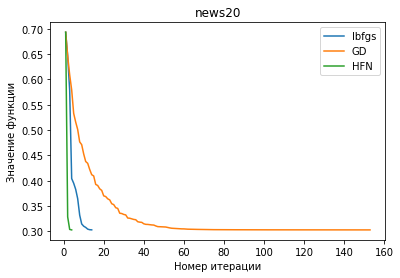

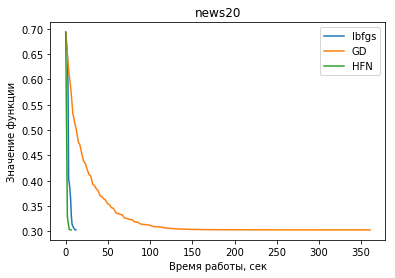

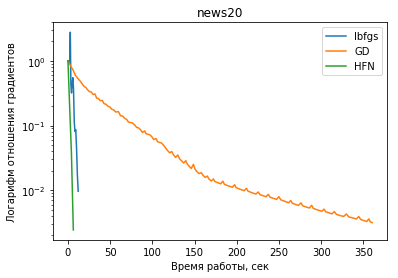

12.170061
360.539179
6.408818


In [22]:
for i, meth in zip(range(3), methods): 
    plot(range(1, len(histories_w8a[i]['grad_norm']) + 1), histories_w8a[i]['func'], label='%s'%meth)


legend()
title('news20')
ylabel('Значение функции')
xlabel('Номер итерации')
savefig('3_1_nws.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['func'], label='%s'%meth)


legend()
title('news20')
ylabel('Значение функции')
xlabel('Время работы, сек')
savefig('3_2_nws.png')
show()

for i, meth in zip(range(3), methods): 
    plot(histories_w8a[i]['time'], histories_w8a[i]['grad_norm'] / dfx0_norm, label='%s'%meth)

yscale('log')
legend()
title('news20')
ylabel('Логарифм отношения градиентов')
xlabel('Время работы, сек')
savefig('3_3_nws.png')
show()


for i in range(3):
    print(histories_w8a[i]['time'][-1])